<a href="https://colab.research.google.com/github/amruthasharma05/blood-group-detection-using-fingerprint/blob/main/Another_copy_of_Untitled2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Streaming output truncated to the last 5000 lines.
  inflating: /content/archive/dataset_blood_group/A-/cluster_1_3350.BMP  
  inflating: /content/archive/dataset_blood_group/A-/cluster_1_3353.BMP  
  inflating: /content/archive/dataset_blood_group/A-/cluster_1_3356.BMP  
  inflating: /content/archive/dataset_blood_group/A-/cluster_1_3372.BMP  
  inflating: /content/archive/dataset_blood_group/A-/cluster_1_3381.BMP  
  inflating: /content/archive/dataset_blood_group/A-/cluster_1_3394.BMP  
  inflating: /content/archive/dataset_blood_group/A-/cluster_1_3404.BMP  
  inflating: /content/archive/dataset_blood_group/A-/cluster_1_3409.BMP  
  inflating: /content/archive/dataset_blood_group/A-/cluster_1_3414.BMP  
  inflating: /content/archive/dataset_blood_group/A-/cluster_1_3416.BMP  
  inflating: /content/archive/dataset_blood_group/A-/cluster_1_3421.BMP  
  inflating: /content/archive/dataset_blood_group/A-/cluster_1_3423.BMP  
  inflating: /content/archive/dataset_blood_group/A-/cluster_

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


151/151 ━━━━━━━━━━━━━━━━━━━━ 166s 1s/step - accuracy: 0.2579 - loss: 1.9611 - val_accuracy: 0.7477 - val_loss: 0.7368
Epoch 2/10
151/151 ━━━━━━━━━━━━━━━━━━━━ 172s 1s/step - accuracy: 0.6630 - loss: 0.9124 - val_accuracy: 0.7870 - val_loss: 0.5612
Epoch 3/10
151/151 ━━━━━━━━━━━━━━━━━━━━ 193s 1s/step - accuracy: 0.7390 - loss: 0.7066 - val_accuracy: 0.8028 - val_loss: 0.5097
Epoch 4/10
151/151 ━━━━━━━━━━━━━━━━━━━━ 163s 1s/step - accuracy: 0.7730 - loss: 0.6206 - val_accuracy: 0.8622 - val_loss: 0.3849
Epoch 5/10
151/151 ━━━━━━━━━━━━━━━━━━━━ 201s 1s/step - accuracy: 0.7984 - loss: 0.5422 - val_accuracy: 0.8438 - val_loss: 0.4098
Epoch 6/10
151/151 ━━━━━━━━━━━━━━━━━━━━ 202s 1s/step - accuracy: 0.8334 - loss: 0.4647 - val_accuracy: 0.8797 - val_loss: 0.3232
Epoch 7/10
151/151 ━━━━━━━━━━━━━━━━━━━━ 169s 1s/step - accuracy: 0.8453 - loss: 0.4132 - val_accuracy: 0.8429 - val_loss: 0.3876
Epoch 8/10
151/151 ━━━━━━━━━━━━━━━━━━━━ 173s 1s/step - accuracy: 0.8461 - loss: 0.4140 - val_accuracy: 0.825

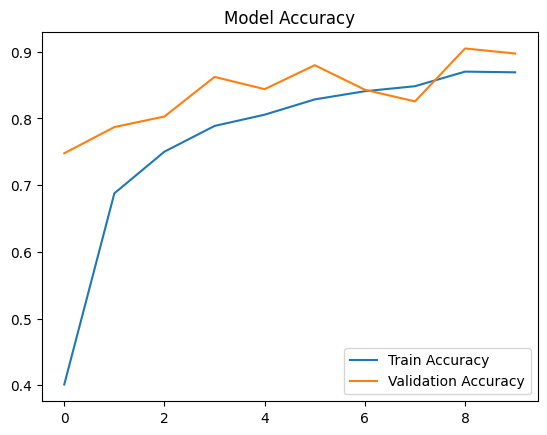

✅ Model saved successfully!


In [ ]:
!unzip "/content/drive/MyDrive/archive.zip" -d /content/archive
# 1. Import necessary libraries
import os
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# 2. Set image size and batch size
img_size = 128
batch_size = 32
data_path = "/content/archive/dataset_blood_group"  # already extracted

# 3. Create data generators
datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)

train_data = datagen.flow_from_directory(
    data_path,
    target_size=(img_size, img_size),
    batch_size=batch_size,
    class_mode='categorical',
    subset='training'
)

val_data = datagen.flow_from_directory(
    data_path,
    target_size=(img_size, img_size),
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation'
)

# 4. Build CNN model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(img_size, img_size, 3)),
    MaxPooling2D(2, 2),

    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),

    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),

    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(train_data.num_classes, activation='softmax')
])

# 5. Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# 6. Train the model
history = model.fit(
    train_data,
    epochs=10,
    validation_data=val_data
)

# 7. Plot accuracy
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title("Model Accuracy")
plt.legend()
plt.show()

# 8. Save the model
model.save("bloodgroup_fingerprint_model.h5")
print("✅ Model saved successfully!")